# Author: Raymond Fleming  

### Course: Machine Learning Fall 2023

### Chosen Classifier: SVM

### Leaderboard Accuracy: .99122 (99.122%)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Read train and test csv's into pandas dataframes
train=pd.read_csv("/kaggle/input/MiniProject1DatasetSpring23/train.csv")
test=pd.read_csv("/kaggle/input/MiniProject1DatasetSpring23/test.csv")

#split training dataset into features and target
X=train.iloc[:,1:32]
y=train.iloc[:,0]




### First, if there are any missing values in the data set, the columns will either need to be dropped or the imputed values added.

In [44]:
#look for null values in training data
train.isnull().sum()

1     0
0     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
ID    0
dtype: int64

### For this dataset, there are no missing values in any column.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>],
       [<Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>],
       [<Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>],
       [<Axes: title={'center': '23'}>, <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>],
       [<Axes: title={'center': '27'}>, <Axes: title={'cente

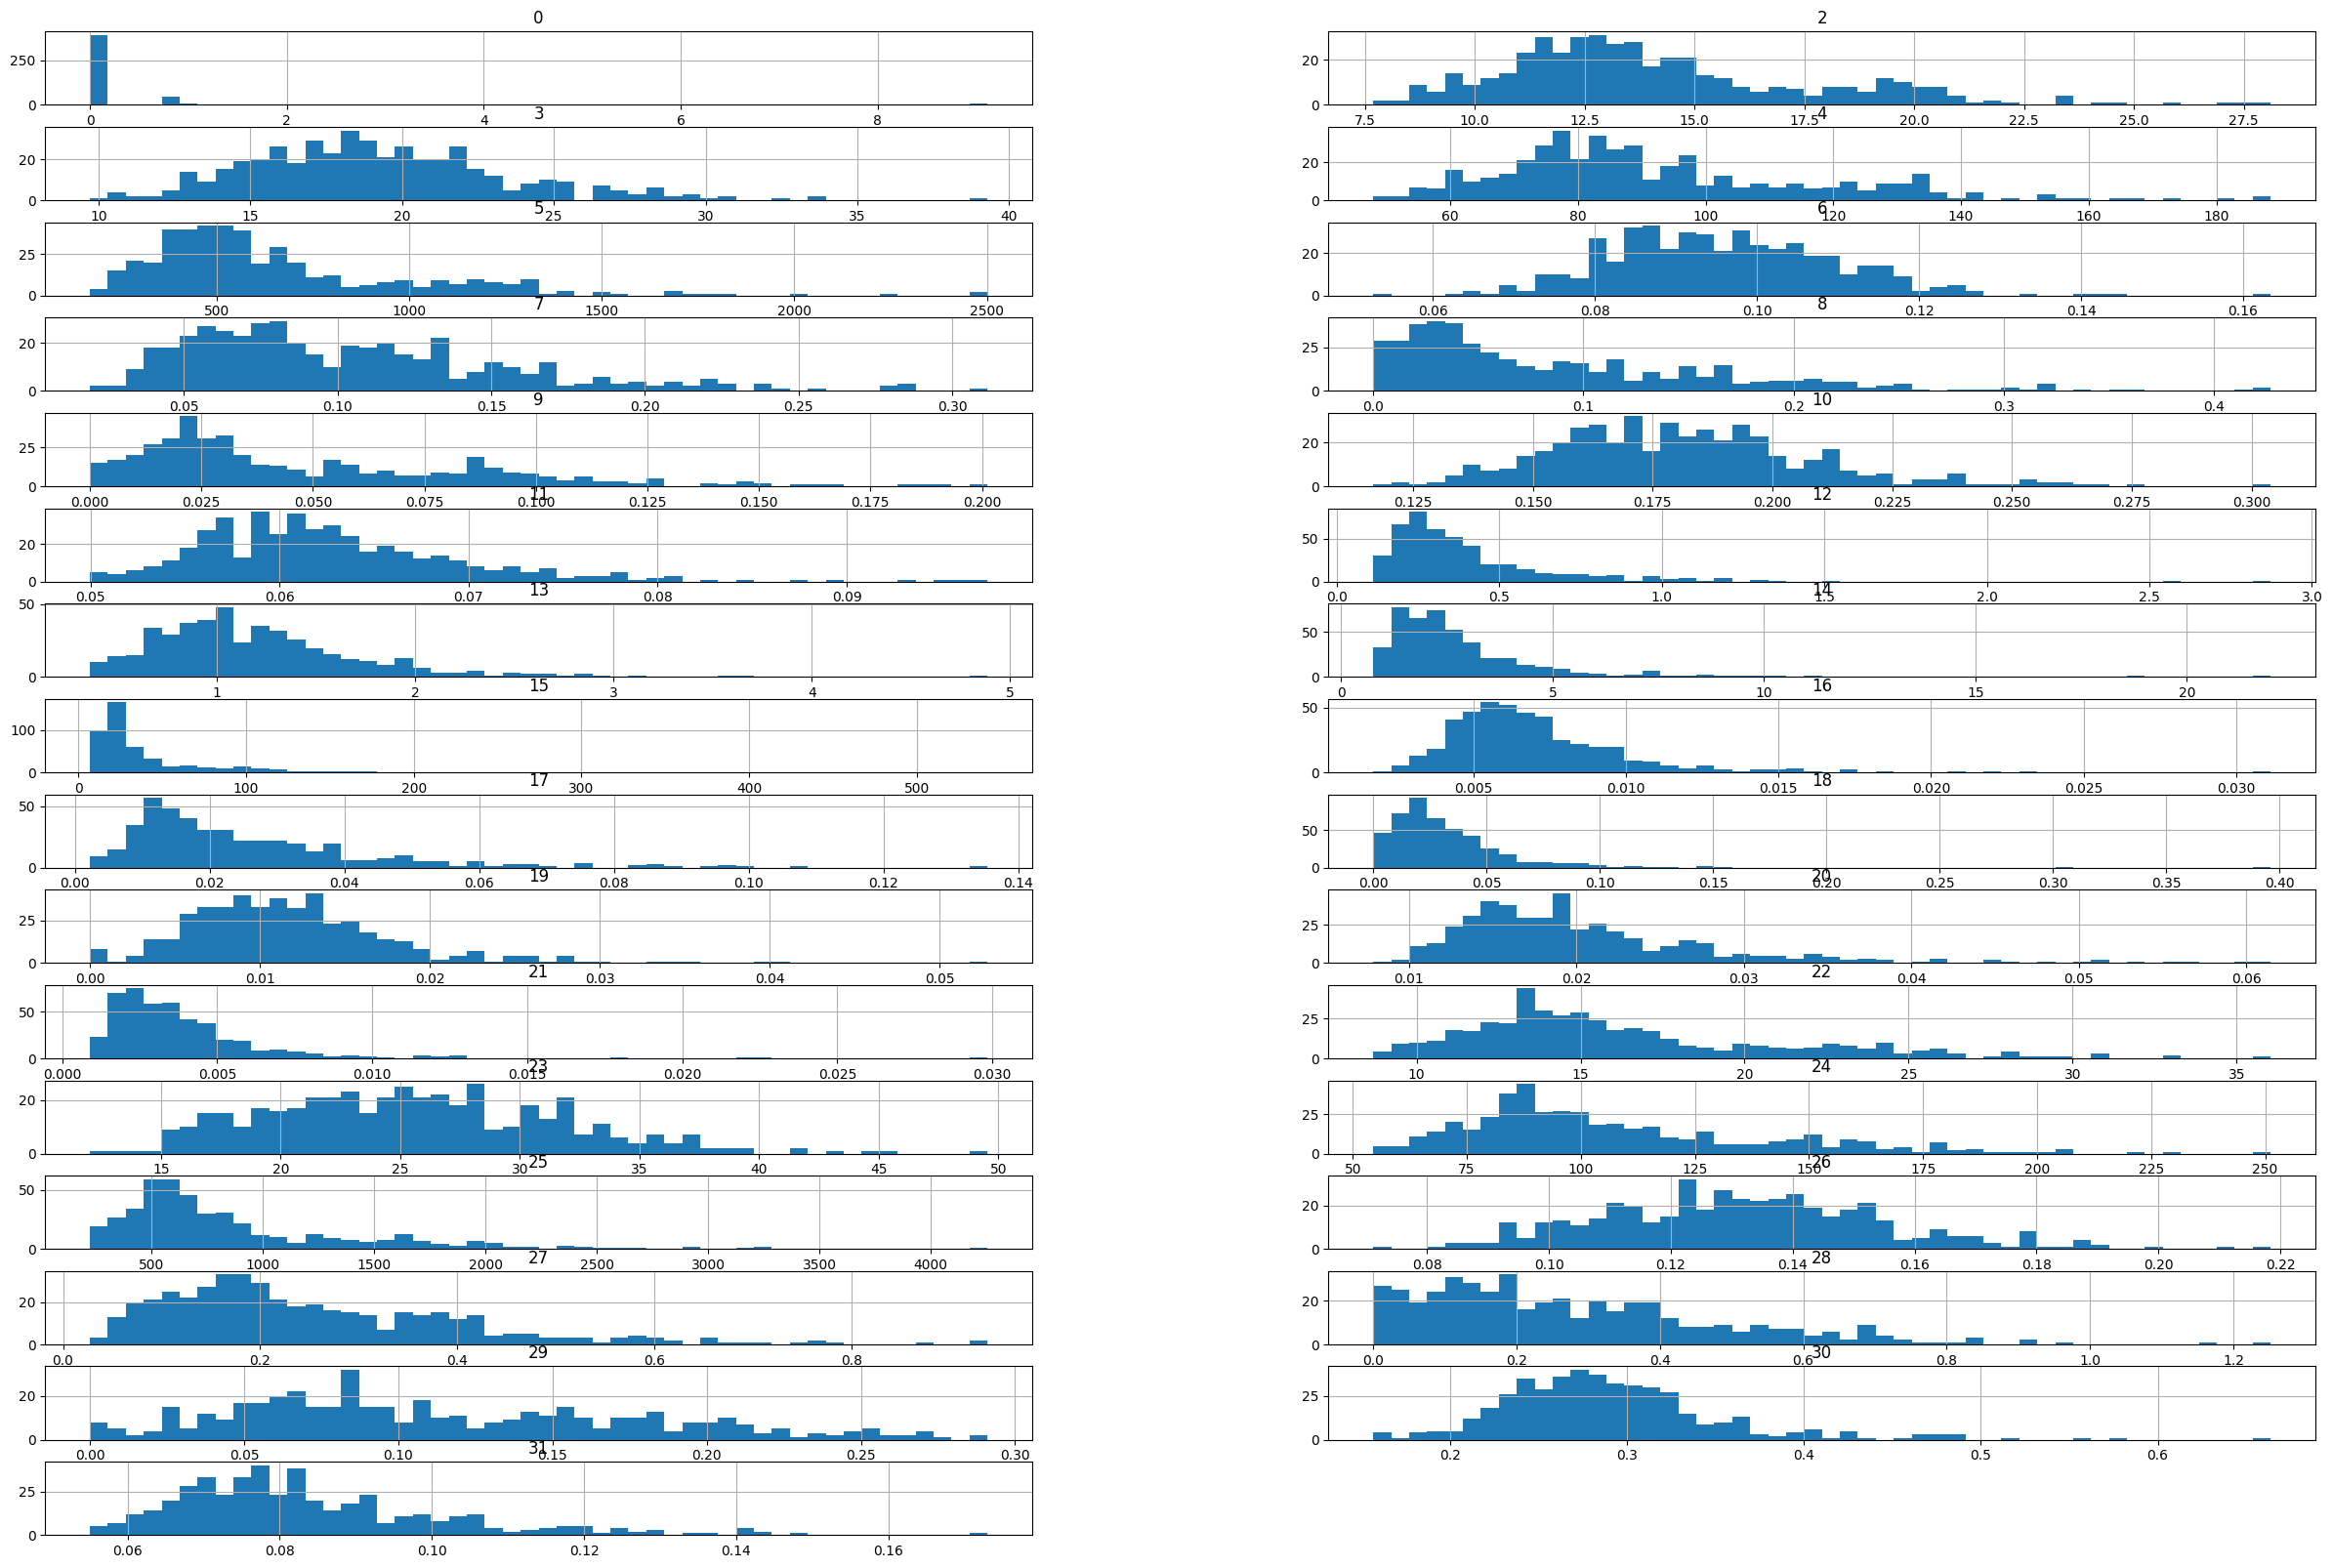

In [45]:
X.hist(bins=50,figsize=(30,20),layout=(16,2))

### In looking at the histograms, columns 0,8,12,14,15,21 are far from normal. These may be able to be transformed, but removing them may provide a better result.  For now, these columns will remain but with non-normality, decision tree or random forest will likely have a better result.

### Next, correlation between the target and the features to identify any columns which are not likely to change the outcome. This will reduce dimensionality and therefore model complexity. Note that slices were used for easier visibility.

In [46]:
Xcorr=pd.concat([y,X])
Xcorr=X
Xcorr.insert(0,"y",y)
CorMat=Xcorr.corr()
CorMat.iloc[:,1:10]

,0,2,3,4,5,6,7,8,9
y,0.053402,0.718073,0.416213,0.731859,0.695171,0.375137,0.590554,0.683262,0.778115
0,1.000000,0.087078,0.122553,0.086515,0.114647,0.014794,0.011885,0.064975,0.061197
2,0.087078,1.000000,0.306881,0.997850,0.986609,0.173051,0.477986,0.647311,0.812377
3,0.122553,0.306881,1.000000,0.313124,0.300314,0.009475,0.229954,0.282160,0.286231
4,0.086515,0.997850,0.313124,1.000000,0.985985,0.210092,0.529721,0.688251,0.842081
5,0.114647,0.986609,0.300314,0.985985,1.000000,0.180709,0.471296,0.659793,0.814273
6,0.014794,0.173051,0.009475,0.210092,0.180709,1.000000,0.672342,0.536920,0.564538
7,0.011885,0.477986,0.229954,0.529721,0.471296,0.672342,1.000000,0.877467,0.825932
8,0.064975,0.647311,0.282160,0.688251,0.659793,0.536920,0.877467,1.000000,0.914671
9,0.061197,0.812377,0.286231,0.842081,0.814273,0.564538,0.825932,0.914671,1.000000


In [47]:
CorMat.iloc[:,10:20]

,10,11,12,13,14,15,16,17,18,19
y,0.348123,-0.014308,0.540126,-0.003226,0.529211,0.517064,-0.058123,0.254370,0.216047,0.380240
0,-0.007575,-0.040094,0.179999,0.017523,0.173018,0.209352,0.129400,0.045397,0.064978,0.096404
2,0.150386,-0.335575,0.666954,-0.092185,0.656071,0.719478,-0.200747,0.159568,0.147813,0.335335
3,0.108045,-0.079010,0.249347,0.355512,0.256270,0.229760,0.011832,0.179560,0.127708,0.180879
4,0.185885,-0.286307,0.680739,-0.081127,0.676192,0.729937,-0.180747,0.204700,0.181934,0.368587
5,0.152679,-0.305321,0.722728,-0.059001,0.710713,0.788217,-0.142247,0.170306,0.166429,0.334764
6,0.539744,0.577171,0.298105,0.071550,0.291915,0.249452,0.311582,0.303096,0.246932,0.373731
7,0.620483,0.569638,0.482867,0.065216,0.534119,0.435444,0.159415,0.724415,0.554362,0.649575
8,0.519030,0.349280,0.615554,0.093922,0.642794,0.597401,0.127219,0.655682,0.683196,0.680136
9,0.476735,0.160184,0.684833,0.031771,0.694657,0.675184,0.047770,0.458476,0.413601,0.596006


In [48]:
CorMat.iloc[:,20:]

,20,21,22,23,24,25,26,27,28,29,30,31
y,0.004723,0.041727,0.766527,0.467479,0.774998,0.722875,0.430364,0.588884,0.649952,0.788885,0.440323,0.312994
0,0.006723,0.041816,0.096496,0.077490,0.095023,0.126527,0.015015,-0.008546,0.022964,0.034915,-0.046638,-0.030767
2,-0.093306,-0.075575,0.969134,0.287590,0.963536,0.941849,0.121926,0.386325,0.496800,0.722309,0.168092,-0.024337
3,0.003095,0.033886,0.332908,0.909718,0.340226,0.318693,0.093301,0.274007,0.282771,0.299703,0.122984,0.102868
4,-0.074067,-0.039047,0.969620,0.294406,0.969674,0.943283,0.153170,0.430426,0.535560,0.751413,0.191948,0.020731
5,-0.061512,-0.049310,0.960519,0.274861,0.955701,0.959723,0.127772,0.364068,0.484949,0.700435,0.144752,-0.026035
6,0.166833,0.260320,0.223284,0.075452,0.251658,0.219265,0.808290,0.492527,0.458749,0.526387,0.385244,0.521392
7,0.226999,0.493149,0.514854,0.247127,0.573716,0.493183,0.572021,0.867774,0.813566,0.817321,0.506480,0.691960
8,0.192412,0.443497,0.665091,0.289986,0.710338,0.659259,0.457626,0.751516,0.884079,0.855087,0.416326,0.519451
9,0.107712,0.228505,0.827695,0.300338,0.855666,0.811102,0.467630,0.664415,0.748041,0.910680,0.391108,0.363804


### From the correlation matrix, columns 0, 11, 13, 16, 20, and 21 have correlation values less than .1. These columns are likely adding nothing to the models except complexity, they will be dropped.

In [49]:
#drop the added target column from X, and the columns listed above from X and test
X.drop(['y','0', '11','13','16','20','21'],inplace=True,axis=1)

#drop columns from test set
test.drop(['0', '11','13','16','20','21'],inplace=True,axis=1)

#create a test dataset to scale
Xtest=test.iloc[:,0:25]


In [50]:
#split training dataset into labeled test and training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

### Next, the training data will be standardized to improve accuracy of the models

In [51]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)

#scale the split train/test sets
XTrainScaled=sc.transform(X_train)
XTestScaled=sc.transform(X_test)

#scale the test dataset
testscaled=sc.transform(Xtest)

In [52]:
from sklearn.linear_model import Perceptron

#create a perceptron instance
Perceptron=Perceptron(eta0=.05,random_state=1)

#fit scaled training data
Perceptron.fit(XTrainScaled,y_train)

#predict with scaled test data
y_pred_perceptron=Perceptron.predict(XTestScaled)

#check accuracy of model
print(f"Perceptron Accuracy:{accuracy_score(y_test,y_pred_perceptron)}")

#Predict the target column using the scaled test set
pred=Perceptron.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('PerceptronSubmission.csv',index=False)

Perceptron Accuracy:0.9927007299270073


### For the perceptron model, the eta0 parameter was adjusted down from .1 to .05 in steps (.1->.05->.01 at which point the accuracy began to decrease. This hyperparameter $\eta_0$ was left at .05 to get the better accuracy, but without the computational complexity of an even smaller $\eta_0$. The best accuracy achieved with this model is 99.270%.

In [53]:
from sklearn.linear_model import LogisticRegression

#create a logistic regression instance
LogRes=LogisticRegression(C=100,solver='lbfgs',multi_class='ovr',max_iter=1000)

#fit logistic regression model
LogRes.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=LogRes.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

#Predict the target column using the scaled test set
pred=LogRes.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('LogResSubmission.csv',index=False)

Accuracy:0.9927007299270073


### The default hyperparameters for this model appear to be a good choice, except that max_iter was added and set to 1000. This is because at the default value, it was reaching max iterations before completion. The best accuracy achieved with this model is 99.270%.

In [54]:
from sklearn.svm import SVC

#create a support vector machine instance
svm=SVC(kernel='linear',C=1,random_state=1)

#fit support vector machine model
svm.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of the support vector machine model using split test set
y_pred=svm.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

#Predict the target column using the scaled test set
pred=svm.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('SVMSubmission.csv',index=False)

Accuracy:0.9927007299270073


### For this dataset, it appears that the default hyperparameter set works well. In testing, a few values for C were tried (.5 and 1.5) neither of which provided a better result. The best accuracy achieved with this model is 99.270%.

In [55]:
from sklearn.tree import DecisionTreeClassifier

#Create a decision tree classifier instance
Tree=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)

#Create a decision tree classifier instance
Tree.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=Tree.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

#Predict the target column using the scaled test set
pred=Tree.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('TreeSubmission.csv',index=False)

Accuracy:0.927007299270073


### For the decision tree, a few max_depth options were tried but this data set does not appear to work well with a decision tree, this model will likely not be used in the final submission The best accuracy achieved with this model is 92.70%.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

#Create a K nearest neighbors instance
knn=KNeighborsClassifier(n_neighbors=5,p=1,metric='minkowski')

#Fit K nearest neighbors model
knn.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=knn.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

#Predict the target column using the scaled test set
pred=knn.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('KNNSubmission.csv',index=False)

Accuracy:0.9854014598540146


### Hyperparameters for the KNN model were adjusted, n_neighbors appears to be its best at the default of 5, but p leads to a better result at 1 rather than 2.  The accuracy is good, but lower than the simple models above. The best accuracy achieved with this model is 98.54%.

In [57]:
from sklearn.ensemble import RandomForestClassifier

#Create a random forest instance
RandomForest=RandomForestClassifier(n_estimators=25,random_state=1,n_jobs=2)

#Fit random forest model
RandomForest.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=RandomForest.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

pred=RandomForest.predict(testscaled)

out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('submission.csv',index=False)

#Predict the target column using the scaled test set
pred=RandomForest.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('RandomForestSubmission.csv',index=False)

Accuracy:0.9635036496350365


### RandomForestClassifier appears similar to decision tree. Its possible that both of these models would perform better without dropping the columns which were dropped earlier in the notebook, but with the high performance of the simpler models this has not been tested. The best accuracy achieved with this model is 96.35%.

## Model Choice

### For this project, the simplest model matching the highest accuracy was used for the submission. In this case, that was the support vector machine model. To determine this, every model was submitted to test the real accuracy. This may not be an option with real world data, in which case overfit may be a concern since it could not easily be tested.  The final submission scores were as follows:  

### Perceptron: 98.245%  

### Logistic Regressoin: 98.245%

### SVM:  99.122%

### Decision Tree: 93.859%

### KNN: unlabeled, but believed to be 96.491%

### Random Forest: 96.491%